In [67]:
from ultralytics import YOLO
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
model = YOLO("nnps_yolov8_200_epochs.pt")

In [37]:
video_path = "../inference/video/zoom_2.webm"

In [38]:
results = model.track(video_path,show=True,save=True,save_dir='nnps_results',device='cpu')



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/309) /home/alber/Desktop/DSB3/behavior-tracking-with-landmarks/src/../inference/video/zoom_2.webm: 224x640 1 Negative, 1 Positive, 27.2ms
video 1/1 (frame 2/309) /home/alber/Desktop/DSB3/behavior-tracking-with-landmarks/src/../inference/video/zoom_2.webm: 224x640 1 Negative, 1 Positive, 19.6ms
video 1/1 (frame 3/309) /home/alber/Desktop/DSB3/behavior-tracking-with-landmarks/src/../inference/video/zoom_2.webm: 224x640 1 Negative, 1 Po

In [20]:
len(results)

306

In [64]:

def exctract_data(results):

    data_df = None

    labels_dict = {0:'Negative', 1:'Positive', 2:'Natural', 3:'Surprise'}
    
    
    for i,result in enumerate(results):
        for res in result:
    
            box = res.boxes
    
            ID = int(box.id.item())
            score = box.conf.item()
    
            label = labels_dict[box.cls.item()]
            x_min,y_min,x_max,y_max = [int(round(x)) for x in box.xyxy.cpu().numpy()[0]]
            
            inner_df = pd.DataFrame({
                "Frame":[i],
                "ID":[ID],
                "Confidence Score":[score],
                "Label":[label],
                "X min":[x_min],
                "Y min":[y_min],
                "X max":[x_max],
                "Y max":[y_max]
            })
    
            if data_df is None:
    
                data_df = inner_df.copy()
                continue
    
            data_df = pd.concat([data_df,inner_df])


    return data_df

In [65]:
df = exctract_data(results)

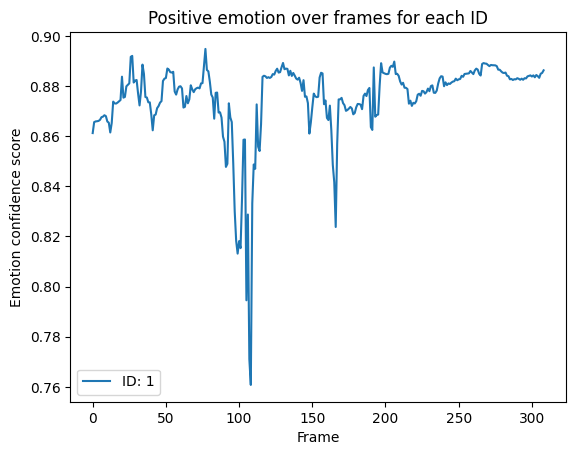

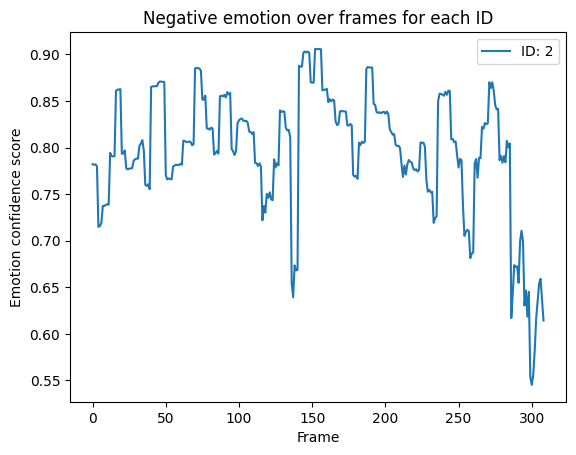

In [94]:
# emotion scores over frames
unique_ids = df.ID.unique()
unique_emotions = df.Label.unique()


# plot emotion confidence score for each id over frames

for label in unique_emotions:

    em_df = df[df['Label'] == label]
    
    for ID in unique_ids:

        id_df = em_df[em_df['ID']==ID].copy()

        if len(id_df) == 0:
            continue
        plt.plot(id_df['Frame'],id_df['Confidence Score'],label=f"ID: {ID}")
        plt.legend()
        plt.xlabel("Frame")
        plt.ylabel("Emotion confidence score")
    plt.title(F"{label} emotion over frames for each ID")
    plt.show()